# Cargar datos

In [72]:
# kmeans
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools
from kmodes.kmodes import KModes
from sklearn import datasets, cluster
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [74]:
# cobweb
from matplotlib.patches import Ellipse

from random import shuffle
from random import seed

from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import adjusted_rand_score

from concept_formation.cobweb3 import Cobweb3Tree
from concept_formation.cluster import cluster
from concept_formation.datasets import load_iris
from concept_formation.trestle import TrestleTree

from random import normalvariate
from random import shuffle
from random import uniform
from random import seed

In [19]:
# comma delimited is the default
df = pd.read_csv('credit_g_smoothed.csv', header = 0)
df.iloc[:5, :]

,Unnamed: 0,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,2,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,3,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,4,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,5,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


# Aplicando método particional | Simple K-means

In [42]:
k_modes = KModes(n_clusters=4)
clusters = k_modes.fit_predict(df)
labels = k_modes.labels_
k_modes.cluster_centroids_ # muestra los distintos centroides

array([['1', '<0', '24.0', 'existing paid', 'radio/tv', '709.0', '<100',
        '1<=X<4', '4.0', 'male single', 'none', '4.0', 'real estate',
        '26.0', 'none', 'own', '1.0', 'skilled', '1.0', 'none', 'yes',
        'good'],
       ['10', '0<=X<200', '18.0', 'critical/other existing credit',
        'new car', '1199.0', '<100', '>=7', '4.0', 'male single', 'none',
        '4.0', 'car', '30.0', 'none', 'own', '2.0',
        'high qualif/self emp/mgmt', '1.0', 'yes', 'yes', 'bad'],
       ['2', '0<=X<200', '12.0', 'existing paid', 'new car', '433.0',
        '<100', '<1', '4.0', 'female div/dep/mar', 'none', '4.0', 'car',
        '23.0', 'none', 'own', '1.0', 'skilled', '1.0', 'none', 'yes',
        'bad'],
       ['3', 'no checking', '24.0', 'critical/other existing credit',
        'radio/tv', '1449.0', '<100', '4<=X<7', '2.0', 'male single',
        'none', '2.0', 'car', '31.0', 'none', 'own', '2.0', 'skilled',
        '1.0', 'yes', 'yes', 'good']], dtype='<U32')

# Aplicando método jerárquico | Cobweb [incomplete]

Se tuvò dificultad conviritendo los datos del dataframe de panda al formato diccionario recibido por la libraria concept_formation

In [60]:
#df.to_dict()

In [65]:
seed(0)

num_clusters = 4
num_samples = 30
sigma = 1

xmean = [uniform(-8, 8) for i in range(num_clusters)]
ymean = [uniform(-8, 8) for i in range(num_clusters)]
label = ['bo', 'bo', 'bo', 'bo', 'bo', 'bo', 'bo']
shuffle(label)
label = label[0:num_clusters]

In [68]:
data = []
actual = []
clusters = []

In [85]:
for i in range(num_clusters):
    data += [{'x': normalvariate(xmean[i], sigma), 'y':
              normalvariate(ymean[i], sigma), '_label': label[i]} for j in
             range(num_samples)]
    actual.append(Ellipse([xmean[i], ymean[i]], width=4*sigma,
                          height=4*sigma, angle=0))
shuffle(data)
trained = []

RuntimeError: Can not put single artist in more than one figure

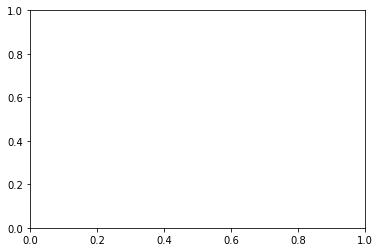

In [87]:
tree = Cobweb3Tree()

# draw the actual sampling distribution
for c in actual:
    c.set_alpha(0.08)
    c.set_facecolor("blue")
    plt.gca().add_patch(c)

# Aplicando método probabilístico | Expectation Maximization [incomplete]

# Aplicando redes neuronales | Self-Organised Maps [incomplete]

# Aplicando reglas de asociación | A priori [incomplete]